<a href="https://colab.research.google.com/github/HenriqueBros/Covid-Analise/blob/main/COVID_19_previsoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns



Exploração da base de dados

Covid-19

In [4]:
covid = pd.read_csv('covid_19_data.csv')

In [5]:
covid.shape

(236017, 8)

In [6]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
df_brasil = covid[covid['Country/Region'] == 'Brazil']
df_brasil.shape

(7772, 8)

In [8]:
df_brasil.head(7772)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
235860,235861,02/27/2021,Roraima,Brazil,2021-02-28 05:22:20,81776.0,1100.0,76102.0
235878,235879,02/27/2021,Santa Catarina,Brazil,2021-02-28 05:22:20,668811.0,7314.0,626305.0
235880,235881,02/27/2021,Sao Paulo,Brazil,2021-02-28 05:22:20,2037267.0,59428.0,1805549.0
235886,235887,02/27/2021,Sergipe,Brazil,2021-02-28 05:22:20,150533.0,2955.0,141391.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


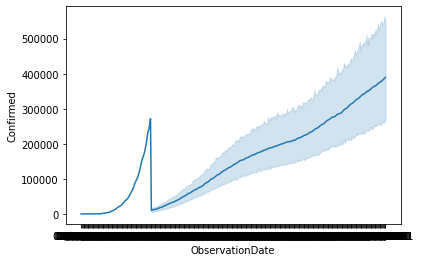

In [9]:
sns.lineplot(df_brasil['ObservationDate'], df_brasil['Confirmed']);

In [10]:
df_sum = covid.groupby('ObservationDate').agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'}).reset_index()

In [11]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/01/2021,84054370.0,1835216.0,47313005.0
1,01/02/2021,84679917.0,1843620.0,47614297.0
2,01/03/2021,85212884.0,1850931.0,47882779.0
3,01/04/2021,85766126.0,1861107.0,48173187.0
4,01/05/2021,86504791.0,1876406.0,48488548.0


In [12]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered
398,12/27/2020,80879838.0,1772241.0,45717710.0
399,12/28/2020,81375961.0,1782022.0,46016136.0
400,12/29/2020,82038435.0,1797397.0,46369231.0
401,12/30/2020,82798666.0,1812465.0,46757476.0
402,12/31/2020,83521859.0,1825578.0,47032627.0


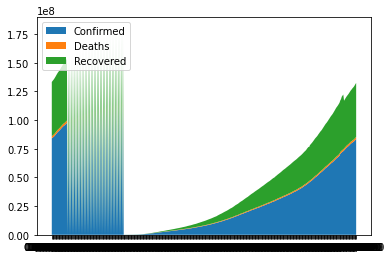

In [13]:
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left')

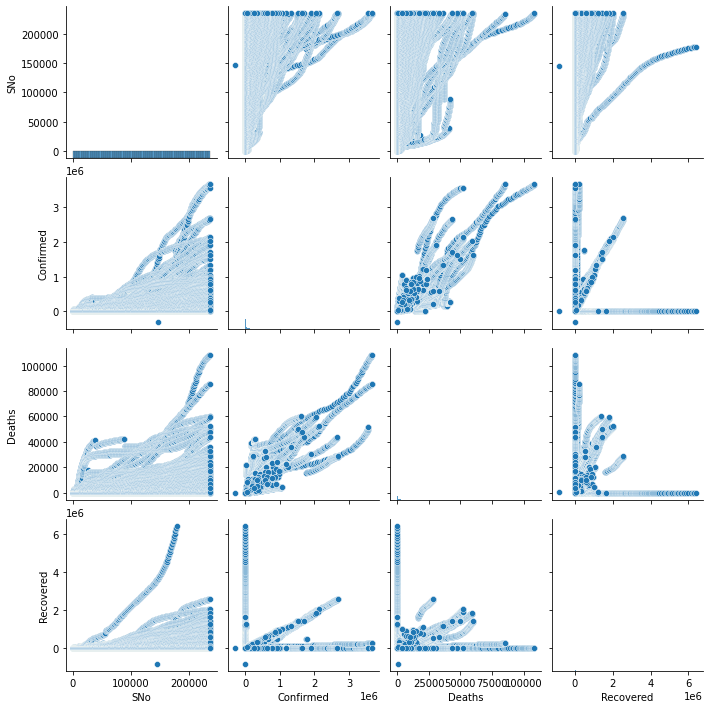

In [14]:
sns.pairplot(covid)